In [1]:
from DataProcessing import extract_layer_thicknesses

path = r'test_data\spectra\+02_+05.csv'
thicknesses = extract_layer_thicknesses(path)
print(thicknesses[0])
print(thicknesses[1])


Captured lines:
"#   0 ""b-Ga2O3"" 112.578456 0.000000 200.000000 1"
"#   1 ""SiO2"" 21.490979 0.000000 40.000000 0"
112.578456
21.490979


In [1]:
from ThinFilmClasses import ThinFilmLayer, ThinFilmSystem
from DataProcessing import process_data, data_smoothing, plot_reflectance, plot_nk, extract_layer_thicknesses
from Optimization import optimize_nk

In [25]:
# 1. Provide the path of the data, lower bound of the wavelength (left), and upper bound of the wavelength (right).
path1 = r"D:\OneDrive - Cornell University\Hongrui\Cornell\Master's project\Code\Reflectance Fitting\bi2o3\set2\film_data_0.4.csv"
data1, left, right = process_data(path1, uncertainty_threshold=0.02)
thickness1 = extract_layer_thicknesses(path1)
print(thickness1)

# 2. Create multilayer system
n_points1 = 10 # Number of points used to fit the n_spline and k_spline
air = ThinFilmLayer("air", 1, 0, left, right)
layer1 = ThinFilmLayer("bi2o3", thickness1[0], n_points1, left, right)
layer2 = ThinFilmLayer("sio2", thickness1[1], n_points1, left, right)
substrate = ThinFilmLayer("c-Si", 1, 0, left, right)

multilayer1 = ThinFilmSystem([air, layer1, substrate])
R2, _, _ = multilayer1.calculate_RTA(data1['wavelength'])

# 3. Optimization (The most time-consuming step!)
# optimal_data2, optimized_params2 = optimize_nk(multilayer1, layer_index=1, data=data1, n_points=n_points1, weight_n=1, weight_k=10e3, weight_second_diff_n=1, weight_second_diff_k=10e3, smooth=False)

left =  385.462795
right =  795.919803

Captured lines:
#   3 "Bi2O3" 425.045264 0.000000 1000.000000 1
#   4 "SiO2" 169.194379 0.000000 400.000000 1
[425.045264, 169.194379]
nk data found for air.
nk data found for bi2o3.
nk data found for sio2.
nk data found for c-Si.


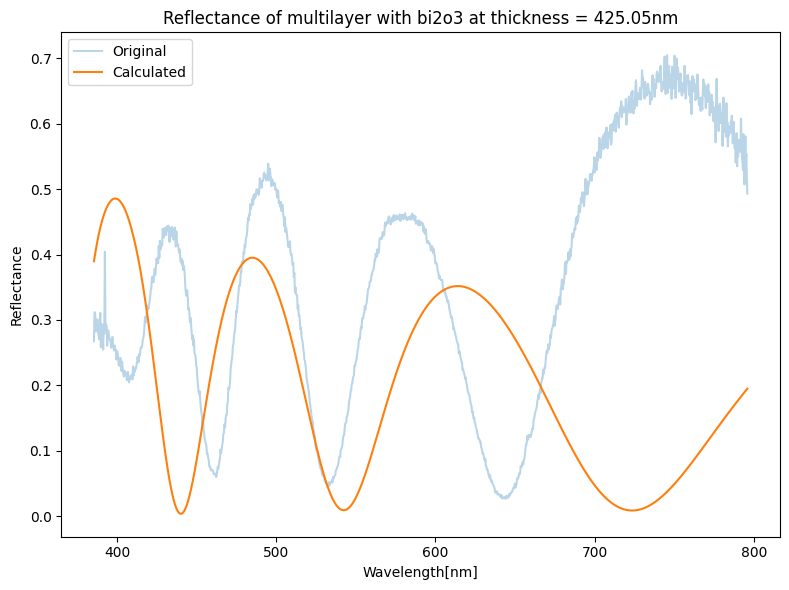

In [27]:
# 4. Plot the reflectance
plot_reflectance(data1, smooth=False, multilayer=multilayer1, layer_index=1, calculated_data=R2)
#plot_nk(data1, optimized_params2, n_points1, multilayer1, layer_index=1)